# Decision Tree Classifier - Worksheet 7 and 8

# Importing Libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Training Dataset

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv(r'C:\Users\Sachin Rattewal\Downloads\Training_Set.csv')

In [4]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
Attribute 1 (a1)    30 non-null int64
Attribute 2 (a2)    30 non-null int64
Class Label         30 non-null int64
dtypes: int64(3)
memory usage: 848.0 bytes


In [5]:
# Let's understand the data, how it look like.
df.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [6]:
df.isnull().any()

Attribute 1 (a1)    False
Attribute 2 (a2)    False
Class Label         False
dtype: bool

In [7]:
# Putting feature variable to X
X = df.drop('Class Label',axis=1)

# Putting response variable to y
y = df['Class Label']

# Fitting the model on Trainig Dataset

In [8]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Visualising the Tree

In [9]:
from sklearn import tree

[Text(558.0, 498.3, 'X[1] <= 21.0\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(279.0, 407.70000000000005, 'X[0] <= 3.0\ngini = 0.401\nsamples = 18\nvalue = [13, 5]'),
 Text(139.5, 317.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(418.5, 317.1, 'X[0] <= 11.0\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(279.0, 226.5, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(558.0, 226.5, 'X[1] <= 12.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(418.5, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(697.5, 135.89999999999998, 'X[1] <= 14.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(558.0, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(837.0, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(837.0, 407.70000000000005, 'X[0] <= 3.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(697.5, 317.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(976.5, 317.1, 'gini = 0.0\nsamples = 10\nvalue 

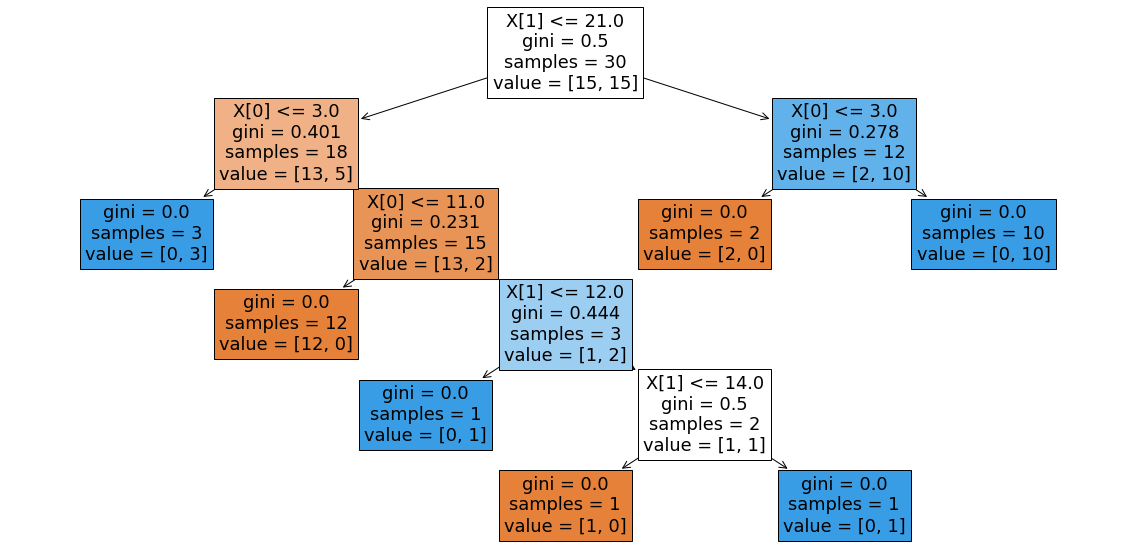

In [10]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_default, filled = True)

In [11]:
print(tree.export_text(dt_default))

|--- feature_1 <= 21.00
|   |--- feature_0 <= 3.00
|   |   |--- class: 2
|   |--- feature_0 >  3.00
|   |   |--- feature_0 <= 11.00
|   |   |   |--- class: 1
|   |   |--- feature_0 >  11.00
|   |   |   |--- feature_1 <= 12.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  12.00
|   |   |   |   |--- feature_1 <= 14.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  14.00
|   |   |   |   |   |--- class: 2
|--- feature_1 >  21.00
|   |--- feature_0 <= 3.00
|   |   |--- class: 1
|   |--- feature_0 >  3.00
|   |   |--- class: 2



# Validation Dataset

In [12]:
df_val = pd.read_csv(r'C:\Users\Sachin Rattewal\Downloads\Validation_Set.csv')

In [13]:
df_val.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [14]:
df_val.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis=1, inplace=True)

In [15]:
# look at column types
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
Attribute 1 (a1)                                 4 non-null int64
Attribute 2 (a2)                                 4 non-null int64
True Class Label                                 4 non-null int64
Class Label as predicted by the decision tree    4 non-null int64
dtypes: int64(4)
memory usage: 256.0 bytes


In [16]:
df_val

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree
0,2,35,1,1
1,12,13,2,1
2,-4,45,2,2
3,2,17,2,2


In [17]:
df_val.drop('Class Label as predicted by the decision tree', axis=1, inplace = True)

In [18]:
X_val = df_val.drop('True Class Label', axis=1)

In [19]:
y_val = df_val['True Class Label']

# Model Building by using the given Hyperparameters

In [20]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 5,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=10)
clf_gini.fit(X_val, y_val)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [21]:
y_pred = clf_gini.predict(X_val) 
print(y_pred) 

[2 2 2 2]


# Checking the gini index value

In [22]:
# accuracy score
clf_gini.score(X_val,y_val)

0.75

# Checking the final accuracy score 

In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_val, y_pred)

In [24]:
print("Overall Accuracy Score is", score*100,"%")

Overall Accuracy Score is 75.0 %


The overall accuracy comes out to be 75% which is good considering the amount of data we have. 